Decision Trees 

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv('covid_tested_individuals.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head(20)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
5,2020-11-12,1,0,0,0,0,negative,No,male,Other
6,2020-11-12,1,1,0,0,0,negative,No,male,Other
7,2020-11-12,0,0,0,0,0,negative,No,female,Contact with confirmed
8,2020-11-12,0,0,0,0,0,negative,No,male,Other
9,2020-11-12,1,1,0,0,0,negative,No,male,Other


In [ ]:
df.dropna(subset = ['age_60_and_above','gender'] , inplace = True )

In [ ]:
X = df[['test_date', 'cough', 'fever', 'sore_throat','shortness_of_breath','age_60_and_above','gender','test_indication']].values
X[0:25]
X1 = df[['test_date', 'cough', 'fever', 'sore_throat','shortness_of_breath','age_60_and_above','gender','test_indication']]

In [ ]:
y = df['corona_result'].values
y[0:25]

array(['negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative'],
      dtype=object)

In [ ]:
X[:,5]

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
X1.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

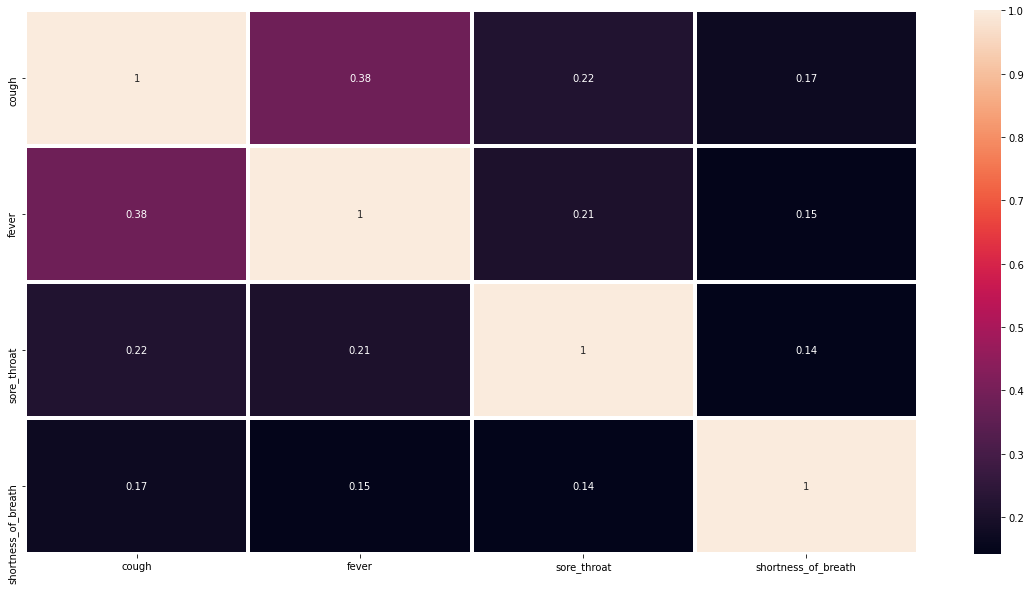

In [ ]:
plt.subplots(figsize=(20,10))
sns.heatmap(data = X1.corr(),annot = True, linewidths=3 )
plt.show()

female    1123893
male      1062334
Name: gender, dtype: int64


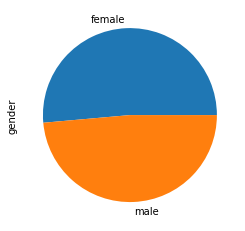

In [ ]:
print(X1['gender'].value_counts())
X1['gender'].value_counts().plot.pie();

negative    1943172
positive     208726
other         34329
Name: corona_result, dtype: int64


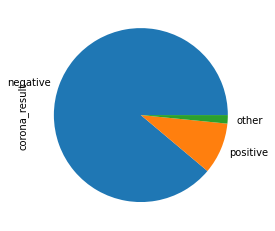

In [ ]:
print(df['corona_result'].value_counts())
df['corona_result'].value_counts().plot.pie();

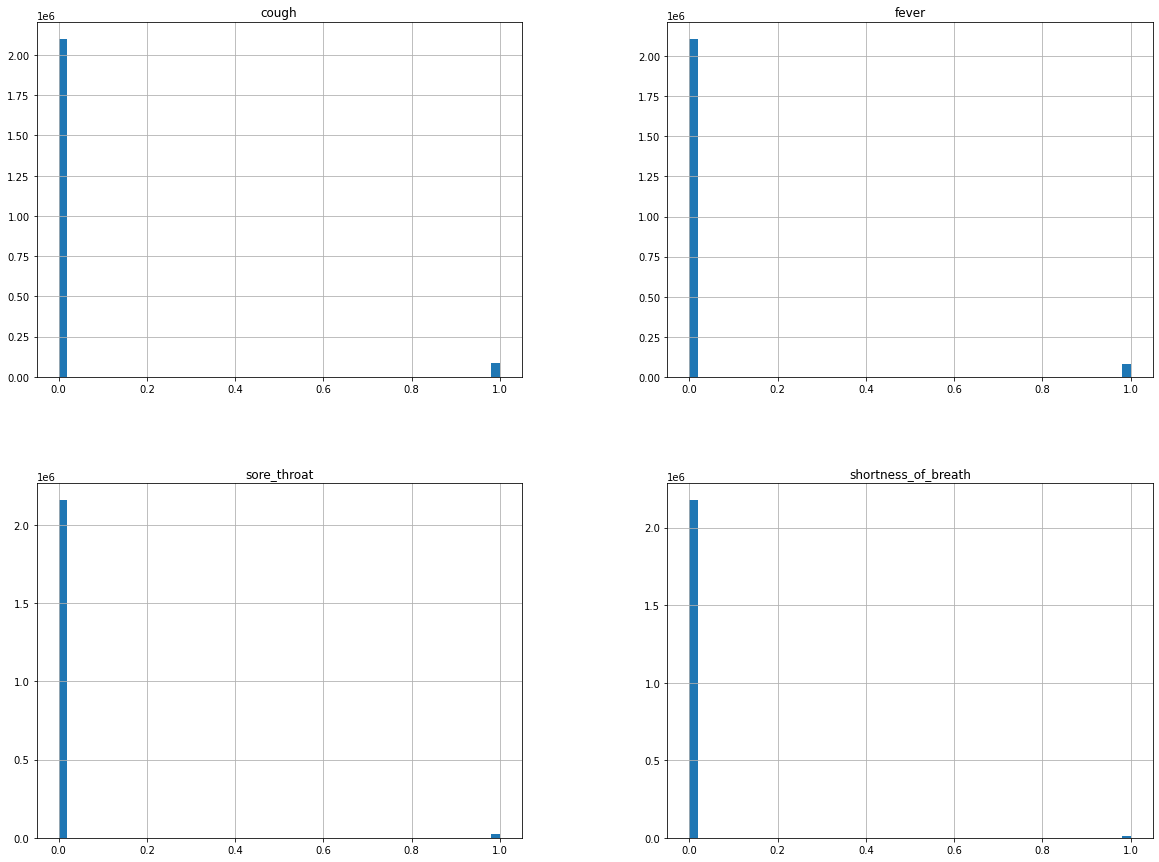

In [ ]:
X1.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, train_size=0.8, test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(1748981, 8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_X_train = X_train.copy()

label_X_valid = X_valid.copy()
object_cols = ['age_60_and_above','gender','test_indication']

# Applying label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:

    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

In [ ]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)
#print(train_X.shape, test_X.shape)
#print(train_y.shape, test_y.shape)

(1748981, 8) (437246, 8)
(1748981,) (437246,)


In [ ]:
label_X_train.drop('test_date' ,axis = 'columns' , inplace = True )
label_X_valid.drop('test_date' ,axis = 'columns' , inplace = True )
logistic = LogisticRegression(C = 0.01, solver = 'liblinear')
covid1 = logistic.fit(label_X_train, y_train)
yhat = covid1.predict(label_X_valid)
print(yhat)


['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [ ]:
acc_logisreg = accuracy_score(y_valid, yhat)

In [ ]:
print(acc_logisreg)

0.8931951350040938


In [ ]:
#print('Accuracy is: {}'.format(metrics.accuracy_score(y_valid, yhat)))

Accuracy is: 0.8931951350040938


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_X_train = X_train.copy()

label_X_valid = X_valid.copy()
object_cols = ['age_60_and_above','gender','test_indication']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:

    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

In [ ]:
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
#print(train_X.shape, test_X.shape)
#print(train_y.shape, test_y.shape)

(1748981, 8) (437246, 8)
(1748981,) (437246,)


In [ ]:
label_X_train.drop('test_date' ,axis = 'columns' , inplace = True )
label_X_valid.drop('test_date' ,axis = 'columns' , inplace = True )
covid_tree = DecisionTreeClassifier(criterion = 'gini')
covid1 = covid_tree.fit(label_X_train, y_train)
yhat = covid1.predict(label_X_valid)

In [ ]:
acc_dtree = accuracy_score(y_valid, yhat)

In [ ]:
print(acc_dtree)

0.9114548789468628


In [ ]:
pip install pydotplus

In [ ]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
%matplotlib inline 

In [ ]:
pip install graphviz

In [ ]:
dot_data = StringIO()
filename = "covidtree.png"
featureNames = label_X_train.columns
targetNames = df["corona_result"].unique().tolist()
out=tree.export_graphviz(covid_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(df['corona_result']), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.936227 to fit



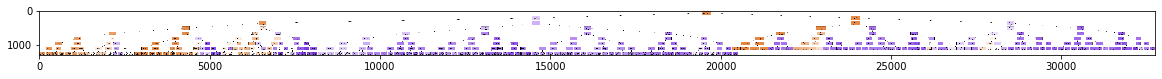

In [ ]:
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier().fit(label_X_valid, y_valid)
yhat = random.predict(label_X_valid)
print(yhat)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, yhat))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.94      0.97      0.95    388558
       other       0.00      0.00      0.00      6866
    positive       0.62      0.56      0.59     41822

    accuracy                           0.91    437246
   macro avg       0.52      0.51      0.51    437246
weighted avg       0.89      0.91      0.90    437246



In [ ]:
acc_rf = accuracy_score(y_valid, yhat)
print(acc_rf)

0.9114960457042489


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, yhat)

0.9114960457042489

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, yhat)

array([[375138,      0,  13420],
       [  5956,      0,    910],
       [ 18412,      0,  23410]])

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score': [acc_logisreg, acc_dtree, acc_rf]})

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.911496
1,Decision Tree,0.911455
0,Logistic Regression,0.893195
